# Module 4 Final Project Submission



**Student name:** Emily Pfeifer

**Student pace:** self-paced

**Scheduled project review date/time:** TBD

**Instructor name:** Eli Thomas

**Blog post URL:** https://pfeiferem.weebly.com/image-classification-with-fashion-mnist.html

# Table of Contents

* 1\. [Introduction](#intro)

   * 1\.1 [The Dataset](#dataset)
   
* 2\. [Loading the Data](#load)

    * 2\.1 [Import Libraries](#import)
    
    * 2\.2 [Open the Data](#open)
    
    * 2\.3 [Remove Target](#target)
    
    * 2\.4 [Null Data](#null)
    
* 3\. [Exploratory Data Analysis](#eda)

    * 3\.1 [Distribution of Classes](#dist)
    
    * 3\.2 [Pixel Distrribution](#pixel)
    
    * 3\.3 [Resizing Images](#resize)
    
* 4\. [Data Preparation](#prep)

    * 4\.1 [Normalization](#norm)
    
    * 4\.2 [Test/Train/Validation Split](#split)
    
    * 4\.3 [Label Encoding](#encode)
    
    * 4\.4 [Reshaping the Data](#reshape)
    
* 5\. [Building our Convolutional Neural Network](#cnn)

    * 5\.1 [Define the CNN](#define)
    
    * 5\.2 [Compile the Model](#compile)
    
    * 5\.3 [Fit the Model](#fit)
    
* 6\. [Evaluation](#eval)

    * 6\.1 [Accuracy Score](#score)
    
    * 6\.2 [Visualizing the Loss Function](#loss)
    
    * 6\.3 [Visualizing Accuracy](#accuracy)
    
* 7\. [Data Augmentation](#improve)

    * 7\.1 [Image Data Generator](#augment)
    
    * 7\.2 [Fit the Model](#fit2)
    
    * 7\.3 [Evaluation](#reval)
    
    * 7\.4 [Loss Function](#loss2)
    
    * 7\.5 [Accuracy](#accuracy2)

* 8\. [Performance](#perform)

    * 8\.1 [Confusion Matrix](#confuse)
    
    * 8\.2 [Classification Report](#report)
    
    * 8\.3 [Display Errors](#errors)
    
    * 8\.4 [Activations](#activations)
    
* 9\. [Conclusion](#conclusion)

<a name="intro"></a>

# 1. Introduction

I was interested in working with the Fashion-MNIST because it felt like the perfect level of complexity for my first computer vision project. In searching for a sensible dataset for image classification, the original MNIST seemed to pop up around every corner. A quick background check via google on the MNIST revealed that it was one of the most heavily utilized datasets for deep learning. I figured that if the MNIST was so popular, it was probably for a reason and that as an aspiring data scientist, I should familiarize myself with it. However, I was a little bit unsatisfied with how overused it had become and I wanted to work on something that was a little bit different, thus leading me to the little cousin of the MNIST, the Fashion-MNIST.

<a name="dataset"></a>

### 1.1 The Dataset

The Fashion-MNIST is a dataset comprised of articles of clothing from Zalandos (a Europearn E-commerce fashion company). The dataset includes 60,000 images in the training set and 10,000 images in the test set, all black-and-white and sized 28 x 28. There are ten individual classes; T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot. The dataset was retrieved from Zalando's Research github.

<a name="load"></a>

# 2. Loading the Data

<a name="import"></a>

### 2.1 Importing Libaries

In [1]:
#import necessary libraries
import pandas as pd #work with dataframes
import numpy as np #math


import matplotlib.pyplot as plt #visualizations
import matplotlib.image as mpimg
import seaborn as sns #more graphing
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split #machine learning
from sklearn.metrics import confusion_matrix #evaluation
from sklearn.metrics import classification_report, f1_score
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential #sequential model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D #layers, layers operations, layer types
from keras.optimizers import RMSprop #compile/optimizer
from keras.preprocessing.image import ImageDataGenerator #data augmentation
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep') #set style

Using TensorFlow backend.


Our first step is to open and read our data, which I just downloaded from Zalando's github.

<a name="open"></a>

### 2.2 Open the Data

In [2]:
df_train_raw = pd.read_csv("fashion-mnist_train.csv") #read and open the train set
df_test_raw = pd.read_csv('fashion-mnist_test.csv') #read and open the test set

Let's take a quick look and make sure that nothing looks out of line in the head of the data.

In [3]:
df_train_raw.head() #preview the data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It looks like everything was loaded properly, let's continue by removing our target (aka the class label that indicates what article of fashion an image is depicting) from our training dataset.

<a name="target"></a>

### 2.3 Removing Target

In [4]:
y_train_set = df_train_raw["label"] #setting y variable

# Drop 'label' column from x_train
X_train_set = df_train_raw.drop(labels = ["label"],axis = 1) 

y_test_set = df_test_raw["label"] #setting y variable

# Drop 'label' column from x_test
X_test_set = df_test_raw.drop(labels = ["label"],axis = 1) 

As I mentioned before, this dataset seems to have been used by many people so I do not think that there is any real data cleaning to complete, but just to make sure that there are no issues in the dataset that we downloaded, let's go ahead and check for null data in both our test set and our training set.

<a name="null"></a>

### 2.4 Checking for Null Data

In [5]:
# Check for null data in training set
X_train_set.isnull().values.any()

False

In [6]:
X_test_set.isnull().values.any() #check for null data in test set

False

I don't see any NaN values, which means it's time to get a better feel for the data and begin with some Exploratory Data Analysis. 

<a name="eda"></a>

# 3. Exploratory Data Analysis



The first thing that I want to take a look at is the class distribution of our data. I am predicting that it will be mostly even, but let's go ahead and make a visualization just to be sure.

<a name="dist"></a>

### 3.1 Distribution of Classes

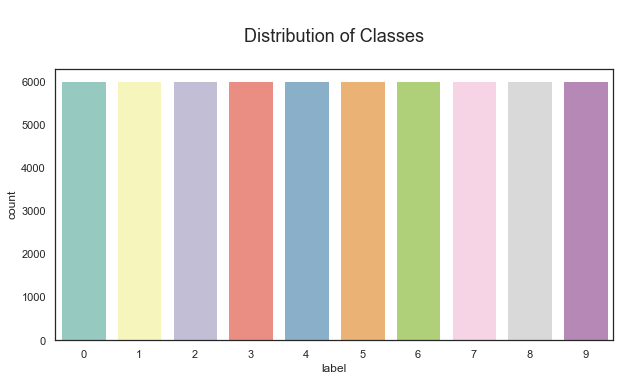

In [7]:
#let's get the distribution of classes
plt.figure(figsize=(10,5))
spread = sns.countplot(data=df_train_raw, x= "label", palette="Set3").set_title('\n Distribution of Classes \n', fontsize = 18) 

It looks like there's the same number of images of each article of clothing, but just in case our eyes are fooling us, let's get a count for each class.

In [8]:
df_train_raw.label.value_counts() #verify everything is even with hard numbers

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

We were right, there is a completely even distribution of classes in the dataset, which will make it easier to work with. Let's continue on by examining the pixel distribution.

<a name="pixel"></a>

### 3.2 Pixel Distribution

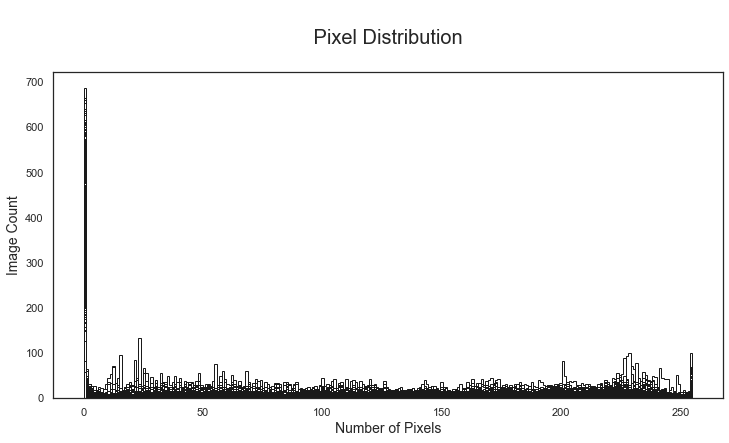

In [9]:
pix_dist = X_train_set.iloc[:1000,1:] #subset of 1000 images
plt.subplots(figsize=(12,6)) #visualization
plt.hist(pix_dist, bins=256, fc='k', ec='k',histtype='step') #histtype = step to reduce computation time
plt.title('\n Pixel Distribution \n', fontsize = 20)
plt.xlabel('Number of Pixels', fontsize=14)
plt.ylabel('Image Count', fontsize =14)
plt.show()

To gain a little bit more information and actually see what these pictures look like, let's try resizing a few of the images from the flat array.

<a name="resize"></a>

### 3.3 Viewing the Resized Images

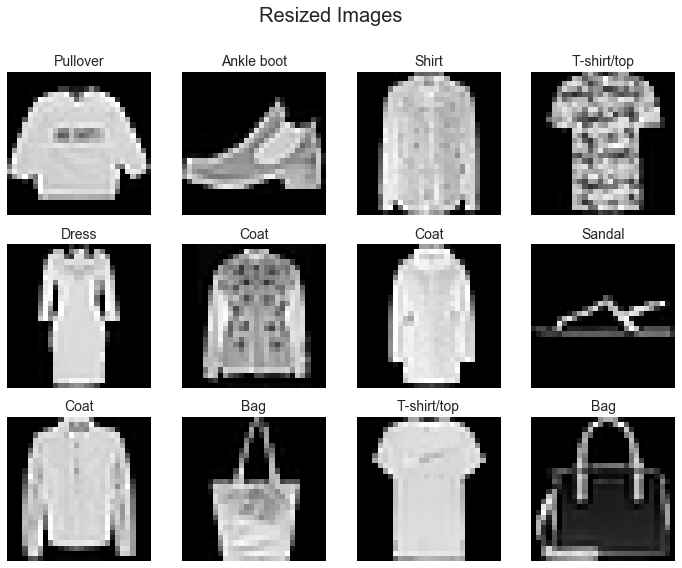

In [10]:
#defining the labels for each image type
classes_fash = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

#visualization
fig = plt.figure(figsize=(12,9))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    image_resized = np.resize(df_train_raw.iloc[i,1:].values,(28,28)) #resizing the images
    plt.title(classes_fash[df_train_raw.iloc[i,0]], fontsize = 14) #label to corresponding image
    plt.imshow(image_resized, cmap='gray', interpolation='none') #greyscale as the dataset described
    plt.axis('off')
fig.suptitle('Resized Images', fontsize =20)
plt.show()

The images look as expected. They correspond with the classes that the dataset description listed. While they are blurry and black and white (which was also expected), it is easy to tell which category each image belongs to, even if the labels were not listed above each image for convenience.

<a name="prep"></a>

# 4. Data Preparation

<a name="norm"></a>

### 4.1 Normalization of Data

To standardize our data, we will divide by 255 because pixel values are integer values between 0 and 255. 

In [11]:
# Normalize the data
X_train = X_train_set / 255.0 
X_test = X_test_set / 255.0

<a name="split"></a>

### 4.2 Test/Train/Validation Split

When working with Keras, it is best to have a test set, a train set, and also a validation set. Because the Fashion-MNIST dataset was already split into a test set and a training set, we will use sklearn's built-in function to split the train set into a train set and a validation set. We will create the validation set using 20% of our train data.

In [12]:
#test/train/validation split
X_train, X_val, y_train_set, y_val_set = train_test_split(X_train, y_train_set, test_size=0.2, random_state=12)

<a name="encode"></a>

### 4.3 Label Encoding

We must one hot encode our label variable because it is not a binary and our model will not run on it as-is. I waited to label encode until after the test/train/validation split so that I could still reference our un-transformed label data later when using sklearn's built-in classification metrics functions, which typically work best with number arrays.

In [13]:
# switch categorical labels to one hot vectors 
y_train = to_categorical(y_train_set, num_classes = 10)
y_test = to_categorical(y_test_set, num_classes = 10)
y_val = to_categorical(y_val_set, num_classes = 10)

<a name="reshape"></a>

### 4.4 Reshaping the Data

All of our images (28px x 28px) have been stocked into the dataframe as 1D vectors of 784 values. Our next step is to reshape this data into 28x28x1 3D matrices.

Keras requires an extra dimension in the end that corresponds to channels. Fashion - MNIST images are gray scaled, so only one additional channel is necessary (for RGB images, there are 3 channels, so we would have reshaped 784px vectors to 28x28x3 3D matrices).

In [14]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1) #train set reshape
X_test = X_test.values.reshape(-1,28,28,1) #test set reshape
X_val = X_val.values.reshape(-1,28,28,1) #validation set reshape

In [15]:
#now let's check our work
print("X_train shape:", X_train.shape) #printing the shape of each respective set
print("X_validate shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)


So far, so good! The images are reshaped to reflect their true size and the label data is also reshaped to reflect that it is categorical and not just a binary (since there are nine separate classes).

<a name="cnn"></a>

# 5. Creating our Convolutional Neural Network

<a name="define"></a>

### 5.1 Define the CNN

To create the CNN, I used Keras Sequential model which is formed by adding each individual layer one at a time. My first layer was a Con2D (convolutional) layer which essentially applies a set of trainable filters to the data. The filters work by transforming a part of an image (which is set by the size of the kernel) using the kernel filter. The kernel filter matrix is then applied to the whole image. In this layer, I also set the activation to 'relu' to include a rectifier activation function that will add non-linearity to the network. Additionally, I set the initializer to 'He normalizer', which will initialize the weight vector to have an average of 0 and a variance of 2 divided by the number of features feeding into a layer.

The next step is to apply a downsampling filter, which we can do by adding a pooling layer (denoted by "MaxPool2D"). The pooling layer takes the neighboring pixels into account and chooses the maximal value. This layer also helps us to reduce overfitting. When we combine the pooling and convolutional layers, our model can combine local features and thus recognize more global features in an image.

The following new layer is the dropout layer, which is a regularization method used to reduce overfitting and improve generalization. This layer forces the model to learn features in a distributed way by randomly dropping a portion of the network. 

Then we have the flatten layer, which converts the final features maps into a single 1D vector so that we are able to make use of fully connected layers after all of the Con2D and MaxPool2D layers.

The final layer is the dense layer, to output the probability distribution of each class.

In [16]:
model = Sequential() #sequential model

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_normal', input_shape = (28,28,1))) #convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu')) #convolutional layer
model.add(MaxPool2D(pool_size=(2,2))) #pooling layer
model.add(Dropout(0.25)) #dropout


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')) #convolutional layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')) #convolutional layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) #pooling layer
model.add(Dropout(0.25)) #dropout layer


model.add(Flatten()) #flatten
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5)) #increase dropout in last layer
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<a name="compile"></a>

### 5.2 Compile the Model

Our next step is to compile the model. We will need to add a loss function, an optimizer, and a metric function. The loss function measures how unsuccessful our model performs on images with known labels by calculating the error rate between observed labels and predicted labels. The categorical_crossentropy is a specific function used for categorical classifications with more than two classes.

The optimizer we will use is the RMSprop which adjusts the Adagrad method to minimize the decreasing learning rate. This optimizer is effective and fast.

The metric function will be set to accuracy so that we may evaluate our model's performance. 

In [17]:
from keras import optimizers
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
model.summary() #calling an overview of the model that we have created

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

The model summary is more of just a sanity check to verify that everything came out the way we intended when we built our CNN. Looking over the summary, it appears the way that I imagined it would and it looks like we are now ready to fit the model to our training set!

<a name="fit"></a>

### 5.3 Fitting the Model

In [19]:
%%time

#keeping track of time as this will likely be a while
#fitting the model to the data and storing results in the "tracked" variable
tracked = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs=80,
                    validation_data=(X_val, y_val))


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 210s 4ms/step - loss: 1.0052 - acc: 0.6351 - val_loss: 0.5900 - val_acc: 0.7813
Epoch 2/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.6223 - acc: 0.7711 - val_loss: 0.4862 - val_acc: 0.8218
Epoch 3/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.5215 - acc: 0.8111 - val_loss: 0.4316 - val_acc: 0.8422
Epoch 4/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.4703 - acc: 0.8323 - val_loss: 0.3959 - val_acc: 0.8546
Epoch 5/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.4340 - acc: 0.8457 - val_loss: 0.3729 - val_acc: 0.8605
Epoch 6/80
48000/48000 [==============================] - 205s 4ms/step - loss: 0.4075 - acc: 0.8539 - val_loss: 0.3566 - val_acc: 0.8673
Epoch 7/80
48000/48000 [==============================] - 205s 4ms/step - 

Epoch 58/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.1664 - acc: 0.9386 - val_loss: 0.2076 - val_acc: 0.9272
Epoch 59/80
48000/48000 [==============================] - 205s 4ms/step - loss: 0.1652 - acc: 0.9400 - val_loss: 0.2110 - val_acc: 0.9257
Epoch 60/80
48000/48000 [==============================] - 205s 4ms/step - loss: 0.1636 - acc: 0.9415 - val_loss: 0.2092 - val_acc: 0.9242
Epoch 61/80
48000/48000 [==============================] - 208s 4ms/step - loss: 0.1642 - acc: 0.9403 - val_loss: 0.2112 - val_acc: 0.9231
Epoch 62/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.1598 - acc: 0.9418 - val_loss: 0.2008 - val_acc: 0.9273
Epoch 63/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.1606 - acc: 0.9412 - val_loss: 0.2001 - val_acc: 0.9298
Epoch 64/80
48000/48000 [==============================] - 206s 4ms/step - loss: 0.1577 - acc: 0.9420 - val_loss: 0.2045 - val_acc: 0.9262
Epoch 65/80
48000/48000 [==

<a name="eval"></a>

# 6. Evaluation of Model

It's time to evaluate the performance of our model, so let's form and print the accuracy score, which is a percentage demonstrating how well our model correctly labeled each image. We're also going to show the loss function (Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets).

<a name="score"></a>

### 6.1 Accuracy Score

In [20]:
score = model.evaluate(X_test, y_test, verbose=0) #compute score

In [21]:
print('Test loss:', score[0]) #loss function
print('Test accuracy:', score[1]) #accuracy score

Test loss: 0.18110273407101632
Test accuracy: 0.9356


It looks like we have a test accuracy of roughly 93.6%, which is not bad! Our test loss is about .18, which is pretty low. Let's take a closer look.

<a name="loss"></a>

### 6.2 Visualizing the Model Loss Function

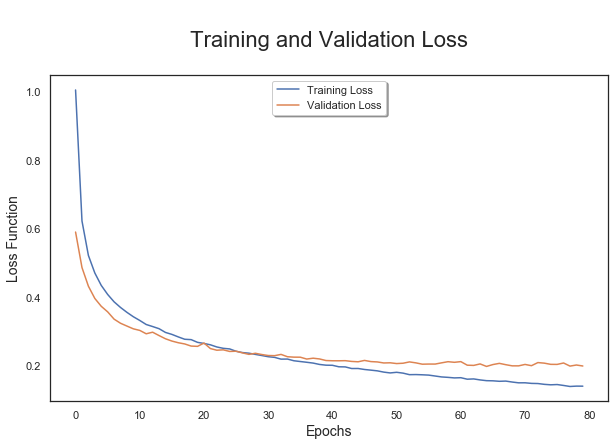

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(tracked.history["loss"], label = "Training Loss")
ax.plot(tracked.history["val_loss"], label = "Validation Loss")
plt.ylabel("Loss Function", fontsize =14)
plt.xlabel("Epochs", fontsize = 14)
plt.title("\n Training and Validation Loss \n", fontsize = 22)
ax.legend(loc = 'upper center', shadow = True)
plt.show()


Our training set and validation set seemed to have performed pretty similiar to each other. However, while the validation set starts with about half the loss that the training set starts with, it does not decrease as much as the training set did. It looks like the training set got the loss down to about .15 while the validation set hovered around .2.

<a name="accuracy"></a>

### 6.3 Visualizing the Model Accuracy

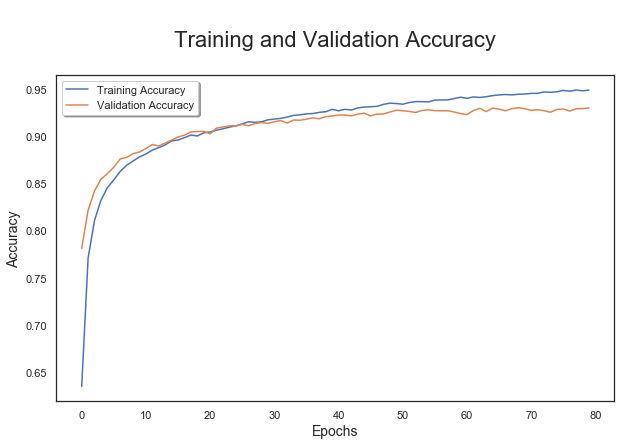

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tracked.history["acc"], label = "Training Accuracy")
ax.plot(tracked.history["val_acc"], label = "Validation Accuracy")
plt.ylabel("Accuracy", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.title("\n Training and Validation Accuracy \n", fontsize = 22)
ax.legend(loc = 'best', shadow = True,)
plt.show()

In our accuracy graph, again, our validation and training sets seemed to have performed very similiar to eachother in most ways, but the validation set started with much higher accuracy. However, once again, our validation set lost a litle bit of steam at the end and while the training set seemed to get close to almost 95% accuracy, the validation set finished closer to about 92%.

Overall, our model performed very well, but let's see what happens when we augment the data.

In [24]:
model.save('Baseline_CNN_run.h5') #in the meantime, save our model

<a name="improve"></a>

## 7. Data Augmentation

<a name="augment"></a>

### 7.1 Image Data Generator

To both further improve our score and minimize overfitting on our data, we will use ImageDataGenerator to artificially increase the size of our dataset. Datagen will create new images from our existing images by performing transformations on the training dataset that mimic the real life variations between images of the same class.

In [25]:
datagen = ImageDataGenerator(
        shear_range = 0.1, #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
        featurewise_center=False,  # set input mean to 0 over the dataset 
        samplewise_center=False,  # set each sample mean to 0 
        featurewise_std_normalization=False,  # divide inputs by std of the dataset 
        samplewise_std_normalization=False,  # divide each input by its std 
        zca_whitening=False,  # apply ZCA whitening 
        rotation_range=10,# randomly rotate images in the range (degrees, 0 to 180) 
        fill_mode = 'constant', #Points outside the boundaries of the input are filled according to the given mode
        cval = 0, #Value used for points outside the boundaries when fill_mode = "constant"
        zoom_range = [.95, 1.0], # Randomly zoom image 
        width_shift_range = [ -2, -1, 0, +1, +2],  # randomly shift images horizontally (fraction of total width) 
        height_shift_range = [-1, 0, +1],  # randomly shift images vertically (fraction of total height) 
        horizontal_flip=True,  # randomly flip images 
        vertical_flip=False)  # randomly flip images 


datagen.fit(X_train)

Now that we have increased the size of the dataset, let's fit our model one more time and see if our score has any improvement.

<a name="fit2"></a>

### 7.2 Fit the Model

In [26]:
%%time

# Fit the model once more
tracked2 = model.fit_generator(datagen.flow(X_train,y_train, batch_size=300),
                              epochs = 80, validation_data = (X_val,y_val))


Epoch 1/80
160/160 [==============================] - 208s 1s/step - loss: 0.5918 - acc: 0.7991 - val_loss: 0.2311 - val_acc: 0.9155
Epoch 2/80
160/160 [==============================] - 213s 1s/step - loss: 0.4259 - acc: 0.8498 - val_loss: 0.2204 - val_acc: 0.9191
Epoch 3/80
160/160 [==============================] - 213s 1s/step - loss: 0.3897 - acc: 0.8606 - val_loss: 0.2243 - val_acc: 0.9201
Epoch 4/80
160/160 [==============================] - 211s 1s/step - loss: 0.3718 - acc: 0.8667 - val_loss: 0.2321 - val_acc: 0.9169
Epoch 5/80
160/160 [==============================] - 213s 1s/step - loss: 0.3567 - acc: 0.8720 - val_loss: 0.2183 - val_acc: 0.9216
Epoch 6/80
160/160 [==============================] - 211s 1s/step - loss: 0.3485 - acc: 0.8762 - val_loss: 0.2282 - val_acc: 0.9188
Epoch 7/80
160/160 [==============================] - 211s 1s/step - loss: 0.3380 - acc: 0.8766 - val_loss: 0.2413 - val_acc: 0.9108
Epoch 8/80
160/160 [==============================] - 213s 1s/step - 

160/160 [==============================] - 216s 1s/step - loss: 0.2498 - acc: 0.9099 - val_loss: 0.2137 - val_acc: 0.9241
Epoch 63/80
160/160 [==============================] - 214s 1s/step - loss: 0.2478 - acc: 0.9123 - val_loss: 0.2178 - val_acc: 0.9232
Epoch 64/80
160/160 [==============================] - 215s 1s/step - loss: 0.2501 - acc: 0.9115 - val_loss: 0.2111 - val_acc: 0.9250
Epoch 65/80
160/160 [==============================] - 216s 1s/step - loss: 0.2482 - acc: 0.9124 - val_loss: 0.2114 - val_acc: 0.9241
Epoch 66/80
160/160 [==============================] - 216s 1s/step - loss: 0.2494 - acc: 0.9129 - val_loss: 0.2105 - val_acc: 0.9248
Epoch 67/80
160/160 [==============================] - 216s 1s/step - loss: 0.2498 - acc: 0.9109 - val_loss: 0.2148 - val_acc: 0.9233
Epoch 68/80
160/160 [==============================] - 215s 1s/step - loss: 0.2498 - acc: 0.9109 - val_loss: 0.2124 - val_acc: 0.9237
Epoch 69/80
160/160 [==============================] - 215s 1s/step - loss

<a name="reval"></a>

### 7.3 Evaluation

Let's see how our model performed with data augmentation.

In [27]:
score = model.evaluate(X_test, y_test, verbose=0) #compute score

In [28]:
print('Test loss:', score[0]) #lost function
print('Test accuracy:', score[1]) #accuracy score
# around: 0.93

Test loss: 0.21274838737249374
Test accuracy: 0.93


Our accuracy score went from 93.6 to 92.6 and our loss function increased from .18 to .21, but these scores are still very high. While we lost about a half percentage in accuracy, I don't think that these numbers tell the whole story, so let's take a look at some visualizations for the accuracy level and the loss function.

<a name="loss2"></a>

### 7.4 Visualizing the Loss Function

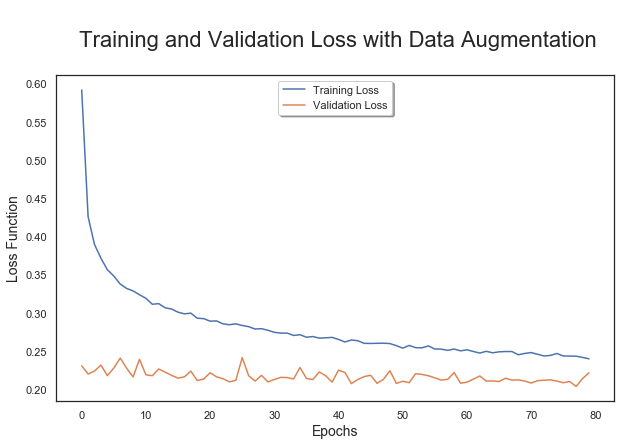

In [29]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(tracked2.history["loss"], label = "Training Loss")
ax.plot(tracked2.history["val_loss"], label = "Validation Loss")
plt.ylabel("Loss Function", fontsize =14)
plt.xlabel("Epochs", fontsize = 14)
plt.title("\n Training and Validation Loss with Data Augmentation\n", fontsize = 22)
ax.legend(loc = 'upper center', shadow = True)
plt.show()

Our loss function graph for our augmented data looks a lot better than in our first model. In this graph, the validation set started with a much lower loss rate than the training set and continued to be lower than the training loss for the duration of the model. While the slope of the loss function was much less steep in the validation set than in the training set, it still did decrease, demonstrating optimization.

<a name="accuracy2"></a>

### 7.5 Visualizing Accuracy

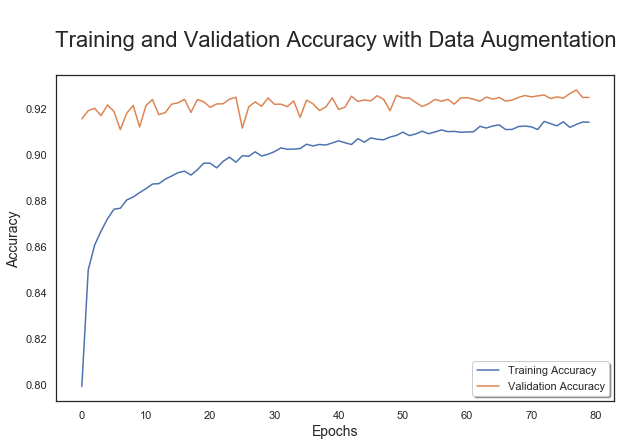

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tracked2.history["acc"], label = "Training Accuracy")
ax.plot(tracked2.history["val_acc"], label = "Validation Accuracy")
plt.ylabel("Accuracy", fontsize = 14)
plt.xlabel("Epochs", fontsize = 14)
plt.title("\n Training and Validation Accuracy with Data Augmentation \n", fontsize = 22)
ax.legend(loc = 'best', shadow = True,)
plt.show()

The consistency of the accuracy level for our augmented data model is also much improved from the accuracy level in our first model when you compare the two graphs. The validation set has an accuracy score that is consistently in the 90's. The validation set also starts much higher than the training set and stays higher than the training set. Similiar to how the loss function for our validation set in our previous graph did not have a huge slope, the increase in accuracy for our validation set is pretty minimal, however, when the accuracy score is already so high, any improvement is likely to be slight.

<a name="perform"></a>

# 8. Performance

Besides the accuracy score and the loss function, there are a lot of ways to dissect our model. In this section, we are going to explore further metrics of classification and try to target which areas our model had the most trouble with. In analyzing our model on a deeper level, we can identify specific problems and then find solutions to combat said problems instead of just randomly adjusting parameters, which is very time-consuming.

<a name="confuse"></a>

### 8.1 Confusion Matrix

Continuing with our model evaluation, let's plot a confusion matrix of validation results to see the drawbacks of our model. Our confusion matrix will show us what type of errors our model made and how many times each article of clothing was misclassified as another article of clothing (as well as which article of clothing it was misclassified as).

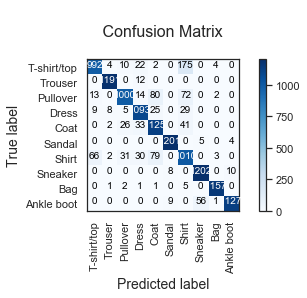

In [31]:
#creating confusion matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='\n Confusion Matrix \n',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap) #visualization
    plt.title(title, fontsize = 16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylim(9.5, -0.5)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text (j, i, cm[i, j], 
                horizontalalignment="center", 
                color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()  #visualization 
    plt.ylabel('True label', fontsize = 14)
    plt.xlabel('Predicted label', fontsize = 14)
    plt.show()

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)

# compute the confusion matrix    
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes_fash)

The confusion matrix reveals a lot of "understandable" mistakes that the model has made. For instance, the most common mistakes that the model made was by far falsely identifying a t-shirt/top as a shirt. The model confused a t-shirt/top for a shirt 175 times, which is more than double the amount that the model mistook a shirt for a coat, which was the second highest area of error. Most of the errors that the model made were also in the same vein, such as confusing a pullover for a coat, or an ankle boot for a sneaker. These are relatively good mistakes to have, because it shows that the model is at least in the right realm of what each image should be.

<a name="report"></a>

### 8.2 Classification Report

In [32]:
predictions = model.predict_classes(X_test, verbose=0) #predict on our test data

In [33]:
print (classification_report(y_test_set, predictions)) #print classification metrics

              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1000
           1       0.99      1.00      0.99      1000
           2       0.95      0.85      0.90      1000
           3       0.93      0.95      0.94      1000
           4       0.88      0.92      0.90      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.83      0.79      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



The lowest F1-Score is for class 6 ('Shirt') with a value of .79. The highest F1-Score is a tie between class 1 ('Trouser') and class 8 ('Bag'), which both had scores of .99. This makes sense after looking at the confusion matrix, which revealed how much trouble our model had with the shirt class. On the other side, it also makes sense that Trouser and Bag were much easier for the model, because they both have very distinct shapes compared to the remaining classes. Most of the F1-Scores are in the 90's, which indicates a high performance overall.

<a name="errors"></a>

### 8.3 Display Errors

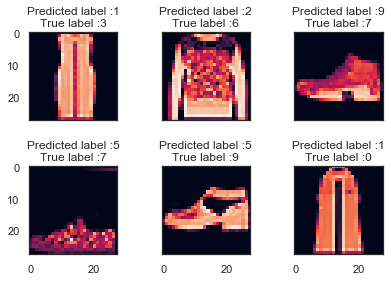

In [34]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    plt.title('Incorrectly Identified Images')
    plt.tight_layout()
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

Looking at the error images up close is also very revealing. It reiterates the "understandable" mistakes that the model made, such as mislabeling the last image as a pair of pants when it was really a T-Shirt/Top (although it looks most like a scarf).

<a name="activations"></a>

### 8.4 Activations

It can be interesting to see what the different layers pick up on. Let's take a closer look at each convolutional layer in our model and visualize what their activations look like. The snippets are taken from Chollet, F (2017).

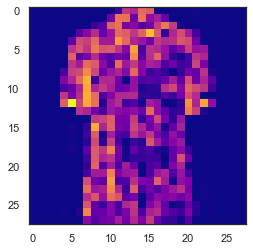

In [35]:
test_image = X_train[130]
plt.imshow(test_image.reshape(28,28), cmap='plasma', interpolation='none')
plt.show()

It looks like a vague outline of a shirt! I can now see why our model had so much struggle with telling a shirt from a T-Shirt or even a coat. In this form, it looks like it could fit into a multitude of classes. Let's examine the activation of the second layer in the first channel.

C:\Users\Emily\Anaconda3\Newfolder\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


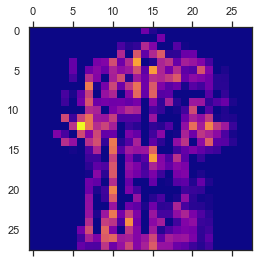

In [36]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_image.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='plasma')

This image is even more vague. Let's proceed and look at the remaining activations of our convolutional layers.

C:\Users\Emily\Anaconda3\Newfolder\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


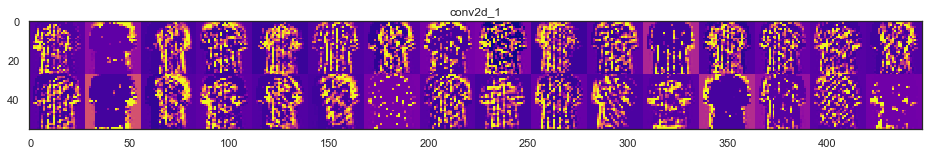

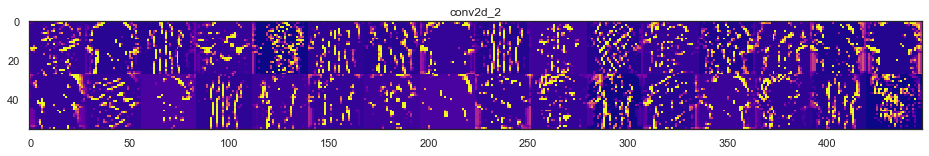

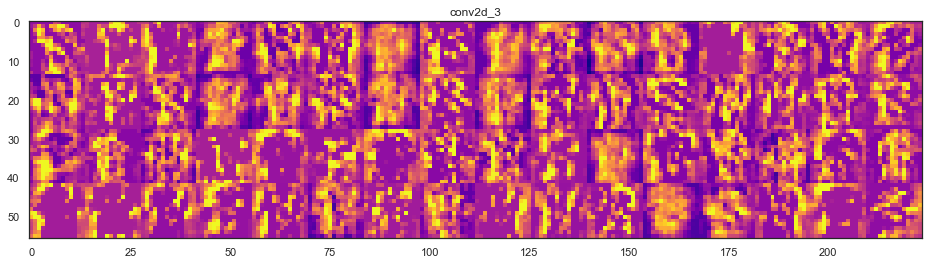

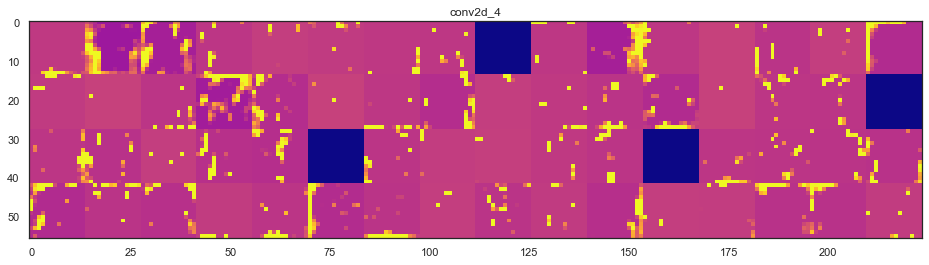

In [37]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='plasma')

Each convolutional layer makes the image look less recognizable to the human eye. While it may not look like much of anything, each filter is responsible for identifying another aspect of the image. 

<a name="conclusion"></a>

# 9. Conclusion

**Findings**

* Between the two models, the highest accuracy score was for the initial model that was fit before we augmented the data

* Model 1 had a score of roughly 93.5% accuracy and model 2 had a score of roughly 93% accuracy

* Model 1 had a loss of .18 and Model 2 had an loss of .21

* The Models struggled most with the identification of Class 6, which was 'Shirt'




**Future Work**

In the future, I would like to explore the Fashion M-NIST again. With more time, it could be both interesting and rewarding to play with the parameters of my convolutional neural network more, add additional epochs and perhaps even try loading the CNN that I built on to another dataset, such as the M-NIST.

In researching my project, I also found that there is a way to enhance recognition of images through preprocessing by using a package like 'Skimage'. When looking at the resized images for the first time, I noticed that it was a little bit tricky to tell a jacket from a shirt, so it's possible that working on the clarity of the images could also make an improvement to the accuracy of the model. 

The beauty of the Fashion M-Nist is its simplicity, which makes it so easy to explore and thus gain an understanding of computer vision processes. With this set, I think it would also be intriguing to someday compare the actiavtion levels between images of the same class as well as of images of different classes, which could also help improve my working knowledge of how CNNs work.
